In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# INTRODUCTION TO TITANIC DATASET

**Dataset containing information that died in the titanic accident**

***Features***

**0-PassengerId** : Even the passenger's number

**1-Survived** : Survive status (1 - 0) after the accident    

**2-Pclass** : Cabin status(theese status 1 - 2 - 3)      

**3-Name**          

**4-Sex**        

**5-Age**        

**6-SibSp** : Number of siblings      

**7-Parch** : The passenger's childreen number    

**8-Ticket** : The passenger's ticket number     

**9-Fare** : The amount payable for the ticket       

**10-Cabin**     

**11-Embarked**: The passenger boarding port 

## Content 

* The correlation of the features in the dataset, 

* The frequencies of the numerical features, 

* The outlier values and the survival rates depending on  categorical features are examined. 

* Feature that has missing value was filled with statstics proccessing , 

* Analyzed relation to survived with other features.

**Library that used**

* Seaborn matplot is used as visualization library

* Pandas 

* Numpy 



## Load and check data 

In [122]:
# read to dataset
data = pd.read_csv('/kaggle/input/titanic/train.csv')

# take a information from data(dtype , 'NaN' values etc..)
data.info()

# try to understand data with first 5 indexs
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Classification of features

**Numerical features** : *The type of feature that has numbers at certain intervals without a certain categorization.*

**Categorical features** : *The type of feature formed by assigning a certain set of features to indexes*

In [28]:
# numerical features
num_features = ['Age' , 'Fare']
# categorical features
cat_features = ['Survived' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked']

# Numbers and visualization of categorical variables

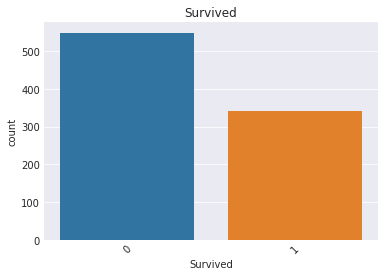

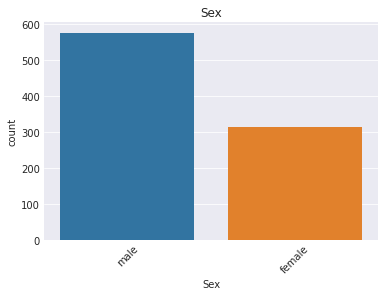

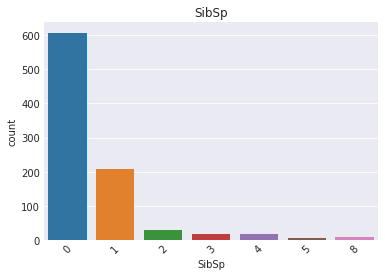

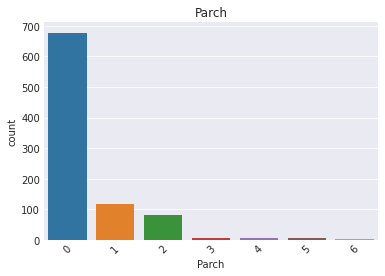

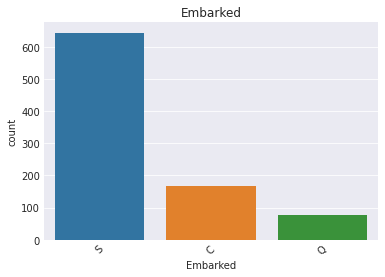

In [29]:
for i in cat_features:
    sns.countplot(data[i])
    plt.xticks(rotation = 45)
    plt.title('{}'.format(i))
    plt.show()
    

# Frequencies of numerical properties

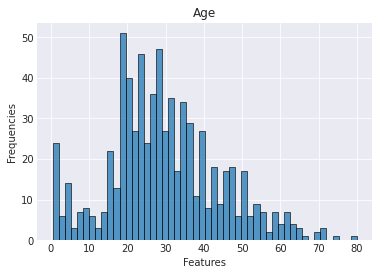

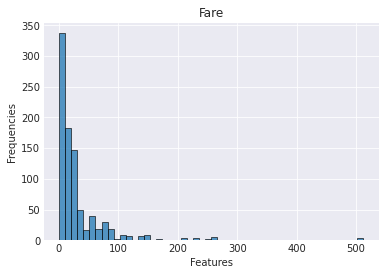

In [30]:
for i in num_features:
    sns.histplot(data[i] , bins = 50)
    plt.title('{}'.format(i))
    plt.xlabel('Features')
    plt.ylabel('Frequencies')
    plt.show()

# Density map of numerical variables

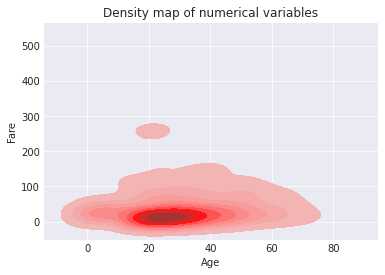

In [31]:
sns.kdeplot(x = 'Age' , y = 'Fare' , data = data , shade = True , color = 'red')
plt.title('Density map of numerical variables')
plt.show()    

**Comment** : High density between the ages of 20 and 40 on the other hand, there was a distribution of 200 and 300 Euros

# Detech the missing values 

In [32]:
# null values counting
data.isnull().sum()

# detecth the missing values in embarked features
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


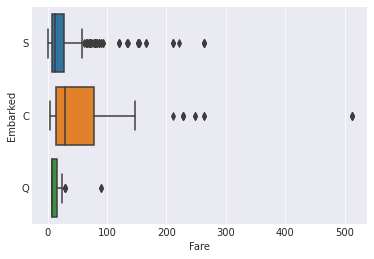

In [33]:
# try to understand missing values in embarked features
sns.boxplot(x = 'Fare' , y = 'Embarked' , data = data)
plt.show()

**Comment** :  With 80 units at the location of the Median, the most purchased type is C so we can fill the missing values with C

In [34]:
# filling missing value 
data[data['Embarked'].isnull()].fillna('C')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


# Detech the outlier values for numerical categorization

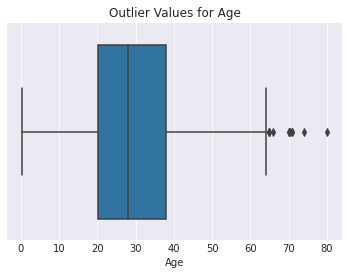

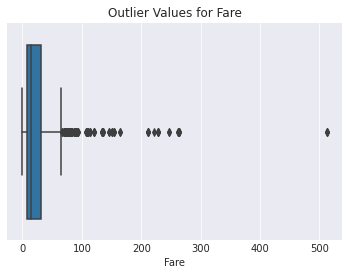

In [35]:
# outlier detection with visualization
for i in num_features:
    sns.boxplot(data[i])
    plt.xlabel('{}'.format(i))
    plt.title('Outlier Values for {}'.format(i))
    plt.show()

# Filling the Age feature

In [49]:
# Calculate the NaN values
data['Age'].isnull().sum()

177

In [50]:
# Detecth the null indexes
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [58]:
# Convert the Sex type for analyze the correlation with Age feature 
# ! data['Sex'] = [1 if i == 'female' else 0 for i in data['Sex']]
data['Sex'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


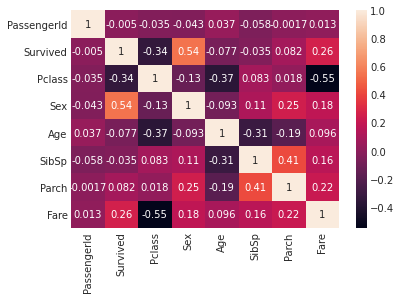

In [59]:
# analyze the correlation with Age feature 
sns.heatmap(data.corr() , annot = True)
plt.show()

**Comment** : Due to correlation map, we understood 'Pclass' , 'Parch' , 'SibSp' feature important in proccesing that filling the missing values for age feature 

In [60]:
# Stored the index that has a NaN values in Age feature
indexes_null = list(data[data['Age'].isnull()].index)
indexes_null

[5,
 17,
 19,
 26,
 28,
 29,
 31,
 32,
 36,
 42,
 45,
 46,
 47,
 48,
 55,
 64,
 65,
 76,
 77,
 82,
 87,
 95,
 101,
 107,
 109,
 121,
 126,
 128,
 140,
 154,
 158,
 159,
 166,
 168,
 176,
 180,
 181,
 185,
 186,
 196,
 198,
 201,
 214,
 223,
 229,
 235,
 240,
 241,
 250,
 256,
 260,
 264,
 270,
 274,
 277,
 284,
 295,
 298,
 300,
 301,
 303,
 304,
 306,
 324,
 330,
 334,
 335,
 347,
 351,
 354,
 358,
 359,
 364,
 367,
 368,
 375,
 384,
 388,
 409,
 410,
 411,
 413,
 415,
 420,
 425,
 428,
 431,
 444,
 451,
 454,
 457,
 459,
 464,
 466,
 468,
 470,
 475,
 481,
 485,
 490,
 495,
 497,
 502,
 507,
 511,
 517,
 522,
 524,
 527,
 531,
 533,
 538,
 547,
 552,
 557,
 560,
 563,
 564,
 568,
 573,
 578,
 584,
 589,
 593,
 596,
 598,
 601,
 602,
 611,
 612,
 613,
 629,
 633,
 639,
 643,
 648,
 650,
 653,
 656,
 667,
 669,
 674,
 680,
 692,
 697,
 709,
 711,
 718,
 727,
 732,
 738,
 739,
 740,
 760,
 766,
 768,
 773,
 776,
 778,
 783,
 790,
 792,
 793,
 815,
 825,
 826,
 828,
 832,
 837,
 839,
 84

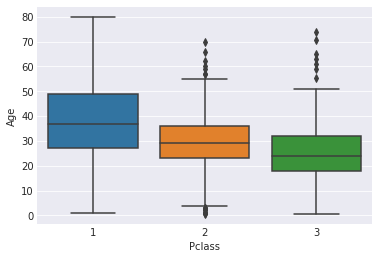

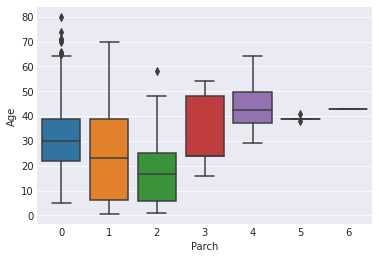

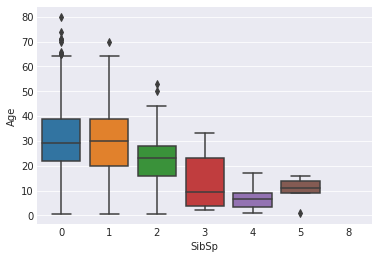

In [81]:
# Analyzed to pclass and age relation
sns.boxplot(x = 'Pclass' , y = 'Age', data = data)
plt.show()

# Analyzed to Parch and age relation
sns.boxplot(x = 'Parch' , y = 'Age' , data = data)
plt.show()

# Analyzed to SibSp and age relation
sns.boxplot(x = 'SibSp' , y = 'Age' , data = data)
plt.show()

**Comment** : 

* *1st pclass passenger are older than 2nd class and 2nd class older than 3st class* 

* *Parch feature can use for threshold that 0 , 1 , 2 features's median is almost '25' and the other feautures's median is almost '35'*

* *Same think possible for SibSp*

## Proccesing that filling the missing value for Age feature 

In [131]:
for i in indexes_null:
    age_pred = data["Age"][((data["SibSp"] == data.iloc[i]["SibSp"]) &(data["Parch"] == data.iloc[i]["Parch"])& (data["Pclass"] == data.iloc[i]["Pclass"]))].median()
    age_med = data["Age"].median()
    
    if not np.isnan(age_pred):
        data["Age"].iloc[i] = age_pred
    
    else:
        data["Age"].iloc[i] = age_med

In [132]:
data['Age'].isnull().sum()

0

# Detecth the outlier values from numerical categorization

In [128]:
def detect_outliers(df,features):
    
    for c in features:
        # 1st quartile
        
        Q1 = np.percentile(data[c],25)
        
        # 3rd quartile
        
        Q3 = np.percentile(data[c],75)
        
        # IQR
        
        IQR = Q3 - Q1
        
        # Outlier step
        
        outlier_step = IQR * 1.5
        
        # detect outlier and their indeces
        
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        
        return outlier_list_col


In [129]:
data.loc[detect_outliers(data , ['Age' , 'Fare'])]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
94,95,0,3,"Coxon, Mr. Daniel",male,59.00,0,0,364500,7.2500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.00,0,0,111240,33.5000,B19,S
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.00,0,0,237442,13.5000,NaN,S


# Relationship between categorical variables and survival rate

### 1 -) Sex - Survived
### 2 -) SibSp - Survived
### 3 -) Parch - Survived
### 4 -) Embarked - Survived

# Sex - Survived

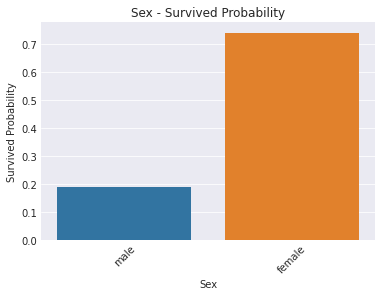

In [38]:
# Sex and Survived 
male_survived = data.Survived[data['Sex'] == 'male'].mean()
female_survived = data.Survived[data['Sex'] == 'female'].mean()

sex_list = list(data['Sex'].unique())
sex_survived_list = [male_survived , female_survived]

df_sex_survived = pd.DataFrame({'Sex' : sex_list , 'Survived Mean' : sex_survived_list})
df_sex_survived

# visualization 

sns.barplot(x = 'Sex' , y = 'Survived Mean' , data = df_sex_survived , alpha = 1)
plt.xticks(rotation = 45)
plt.ylabel('Survived Probability')
plt.xlabel('Sex')
plt.title('Sex - Survived Probability')
plt.show()

#  SibSp - Survived

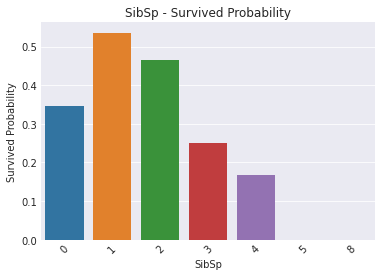

In [39]:
# Sex and Survived 
df_SibSp_Survived = data[['SibSp' , 'Survived']].groupby('SibSp' , as_index = False).mean()
df_SibSp_Survived

# visualization 
sns.barplot(x = 'SibSp' , y = 'Survived' , data = df_SibSp_Survived , alpha = 1)
plt.xticks(rotation = 45)
plt.ylabel('Survived Probability')
plt.xlabel('SibSp')
plt.title('SibSp - Survived Probability')
plt.show()

**Comment** :  The data is not evenly distributed. However, by thresholding for classification, an intermediate level data on education

#  Parch - Survived

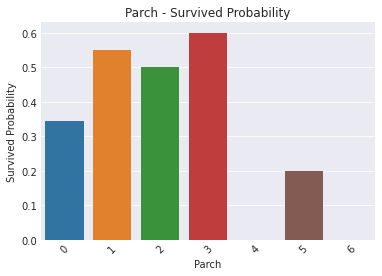

In [40]:
# parch - survived
df_parch_survived = data[['Parch' , 'Survived']].groupby('Parch' , as_index = False).mean()

# visualization 
sns.barplot(x = 'Parch' , y = 'Survived' , data = df_parch_survived , alpha = 1)
plt.xticks(rotation = 45)
plt.ylabel('Survived Probability')
plt.xlabel('Parch')
plt.title('Parch - Survived Probability')
plt.show()

# Embarked - Survived

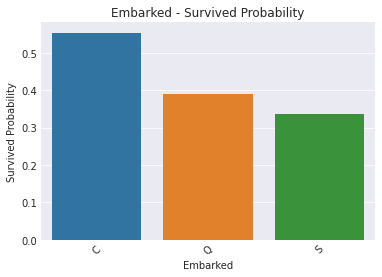

In [41]:
# embarked survived 
df_embarked_survived = data[['Embarked' , 'Survived']].groupby('Embarked' , as_index = False).mean()

# visualization 
sns.barplot(x = 'Embarked' , y = 'Survived' , data = df_embarked_survived , alpha = 1)
plt.xticks(rotation = 45)
plt.ylabel('Survived Probability')
plt.xlabel('Embarked')
plt.title('Embarked - Survived Probability')
plt.show()

# Relationship between categorical variables and survival rate with using factorplot

# Sex - Survived

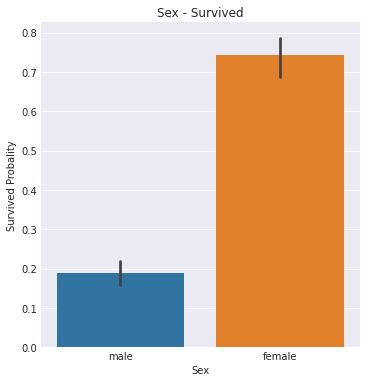

In [42]:
sns.factorplot(x = 'Sex' , y = 'Survived' , data = data , kind = 'bar')
plt.ylabel('Survived Probality')
plt.title('Sex - Survived')
plt.show()

**Comment**: *Since the rate of having confidence in a learning algorithm is higher, we can directly define women as alive.*

# SibSp - Survived

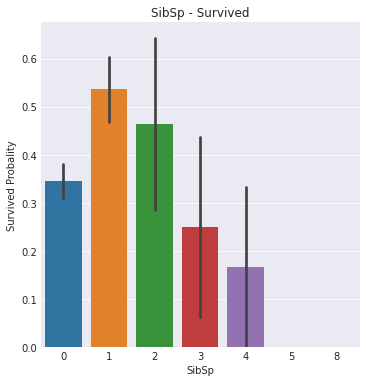

In [43]:
sns.factorplot(x = 'SibSp' , y = 'Survived' , data = data , kind = 'bar')
plt.ylabel('Survived Probality')
plt.title('SibSp - Survived')
plt.show()

**Comment** : *if sibsp == 0 or 1 or 2, passenger has more chance to survive , we can consider a new feature describing these categories.*

# Parch - Survived

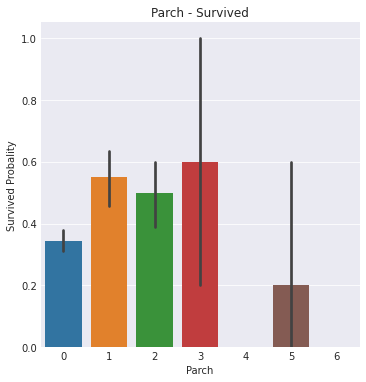

In [44]:
sns.factorplot(x = 'Parch' , y = 'Survived' , data = data , kind = 'bar')
plt.ylabel('Survived Probality')
plt.title('Parch - Survived')
plt.show()


**Comment** : *In this data, the survival rate of small families is more standardized, resulting in the standard deviation of the survival rate of families with 3 or more family members.*

# Age Survived

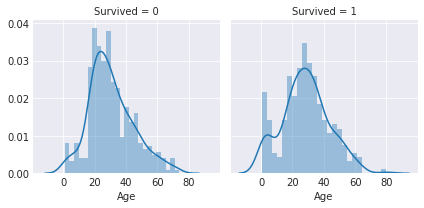

In [45]:
g = sns.FacetGrid(data , col = 'Survived')
g.map(sns.distplot , 'Age' , bins = 25)
plt.show()


**Comment** : 

*Age <= 10 has a high survival rate,*

*oldest passengers (80) survived,*

*large number of 20 years old did not survive,*

*most passengers are in 15-35 age range,*

*use age feature in training*

*use age distribution for missing value of age*

# Pclass Survived Age Relation with Survived

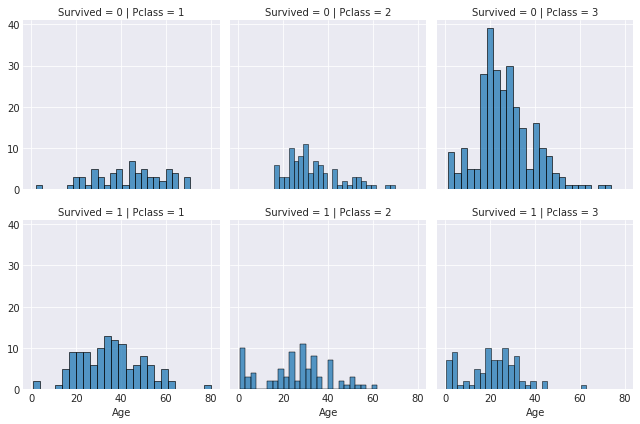

In [46]:
g = sns.FacetGrid(data , col = 'Pclass' , row = 'Survived')
g.map(sns.histplot , 'Age' , bins = 25)
plt.show()


**Comment** : *If pclass is '3' the survival rate decreases, this can provide a good threshold for learning algorithms.*

# Embarked - Pclass - Sex Relation with Survived  

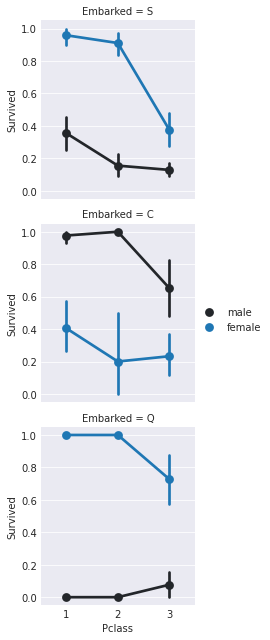

In [47]:
g = sns.FacetGrid(data , row = 'Embarked')
g.map(sns.pointplot , 'Pclass' , 'Survived' , 'Sex')
g.add_legend()
plt.show()

**Comment** : *Female passengers have much better survival rate than males. Males have better survşval rate in pclass 3 in C.*

# Embarked - Sex - Fare with relation with survived

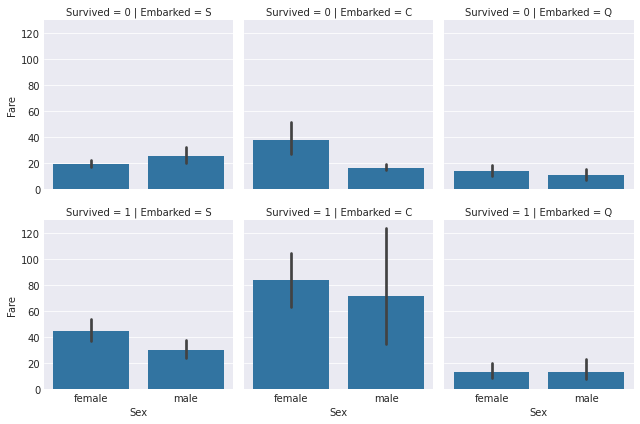

In [48]:
g = sns.FacetGrid(data , row = 'Survived' , col = 'Embarked')
g.map(sns.barplot , 'Sex' , 'Fare')

**Comment** : *Passsengers who pay higher fare have better survival. Fare can be used as categorical for training.*